## About

Jupyter notebook on Text2Image prepared specifically for LLM 2025 class at University of Washington, Seattle.

In this notebook, we go through the following:

a) Set up for diffusion API

b) Use of diffusion API for image generation

c) Playing with different settings for Stable Diffusion

This is part of LLM Lecture series 2025 at University of Washington, Seattle (https://bytesizeml.github.io/llm2025/).

### 1. Setup

In [1]:
! pip install -U transformers
! pip install datasets evaluate -q
! pip install jiwer -q
! pip install -U accelerate
! pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 13.1 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.3.0
    Uninstalling accelerate-1.3.0:
      Successfully uninstalled accelerate-1.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.6 MB/s eta 0:00:00a 0:00:01


In [3]:
# 1. Install Libraries
!pip3 install openai
!pip3 install python-dotenv


# # 2. Connect to Google Drive
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

# import os
# print(os.system('ls'))

# os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

# 3. Open AI API Access Setup
import openai
import os

open_ai_key_file = "open_ai_key.txt"  # Your OPEN AI Key in this file
with open(open_ai_key_file, "r") as f:
    for line in f:
        OPENAI_KEY = line
        break

from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

openai.api_key = OPENAI_KEY

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())



# 4. Open AI text generation APIs
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-3.5-turbo"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content


def get_completion_gpt4o(prompt, model="gpt-4o-mini"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

In [4]:
!pwd

/home/sky/projects/Win25_LLM/Feb 26 Coding Exercise


In [7]:
!ls

Copy_of_Text2Image_LLM_2025.ipynb  hf_token.txt  open_ai_key.txt


## 2. Stability AI demo

In [10]:
## Generates Token and use from hugging face
from huggingface_hub import notebook_login
PATH = "./"
path = PATH + "hf_token.txt"
with open(path, "r") as f:
  HF_TOKEN = f.read()

notebook_login()

Token has not been saved to git credential helper.


In [2]:
%pip uninstall diffusers -y
%pip cache purge
%pip install diffusers==0.27.0
%pip install transformers scipy ftfy
%pip install "ipywidgets>=7,<8"
!wget https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
%pip install wget

Found existing installation: diffusers 0.27.0
Uninstalling diffusers-0.27.0:
  Successfully uninstalled diffusers-0.27.0
Note: you may need to restart the kernel to use updated packages.
Files removed: 6
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
--2025-02-27 00:59:38--  https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6808 (6.6K) [tex

In [3]:
# from google.colab import output
from pathlib import Path
from PIL import Image
import torch
!pip install --upgrade huggingface-hub==0.26.2 transformers==4.46.1 tokenizers==0.20.1 diffusers==0.31.0 # This combo is needed to correctly load the StableDiffusionPipeline
from diffusers import StableDiffusionPipeline
import requests
import getpass
from io import BytesIO
#from image_to_image import StableDiffusionImg2ImgPipeline, preprocess
import os, wget

# output.enable_custom_widget_manager()
cache_drive = False

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 12.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.28.1
    Uninstalling huggingface-hub-0.28.1:
      Successfully uninstalled huggingface-hub-0.28.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.27.0
    Uninstalling diffusers-0.27.0:
      Successfully uninstalled diffusers-0.27.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0


2025-02-27 01:01:09.722344: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 01:01:09.813892: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 01:01:09.813952: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 01:01:09.813969: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 01:01:09.853134: I tensorflow/core/platform/cpu_feature_g

### 2a. Text 2 Image Synthesis

In [4]:
# Helping function for plotting images in a 2D grid
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [5]:
!ls

Copy_of_Text2Image_LLM_2025.ipynb  image_to_image.py
hf_token.txt			   open_ai_key.txt


## 2b. Load Model

In [6]:
#from huggingface_hub import notebook_login
#notebook_login()

import torch
from diffusers import StableDiffusionPipeline

device = "cuda" #using a gpu
model_id = "CompVis/stable-diffusion-v1-4"

pipe_txt2image = StableDiffusionPipeline.from_pretrained(
    model_id,
    revision="fp16",
    torch_dtype=torch.float16,
).to(device)

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/home/sky/miniforge3/envs/llm596/lib/python3.11/site-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/sky/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/sky/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/sky/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/sky/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/sky/miniforge3/envs/llm596/lib/python3.11/site-packages/transformers/mod

## 2c. Model *Inference*

  0%|          | 0/50 [00:00<?, ?it/s]

length of images =  4


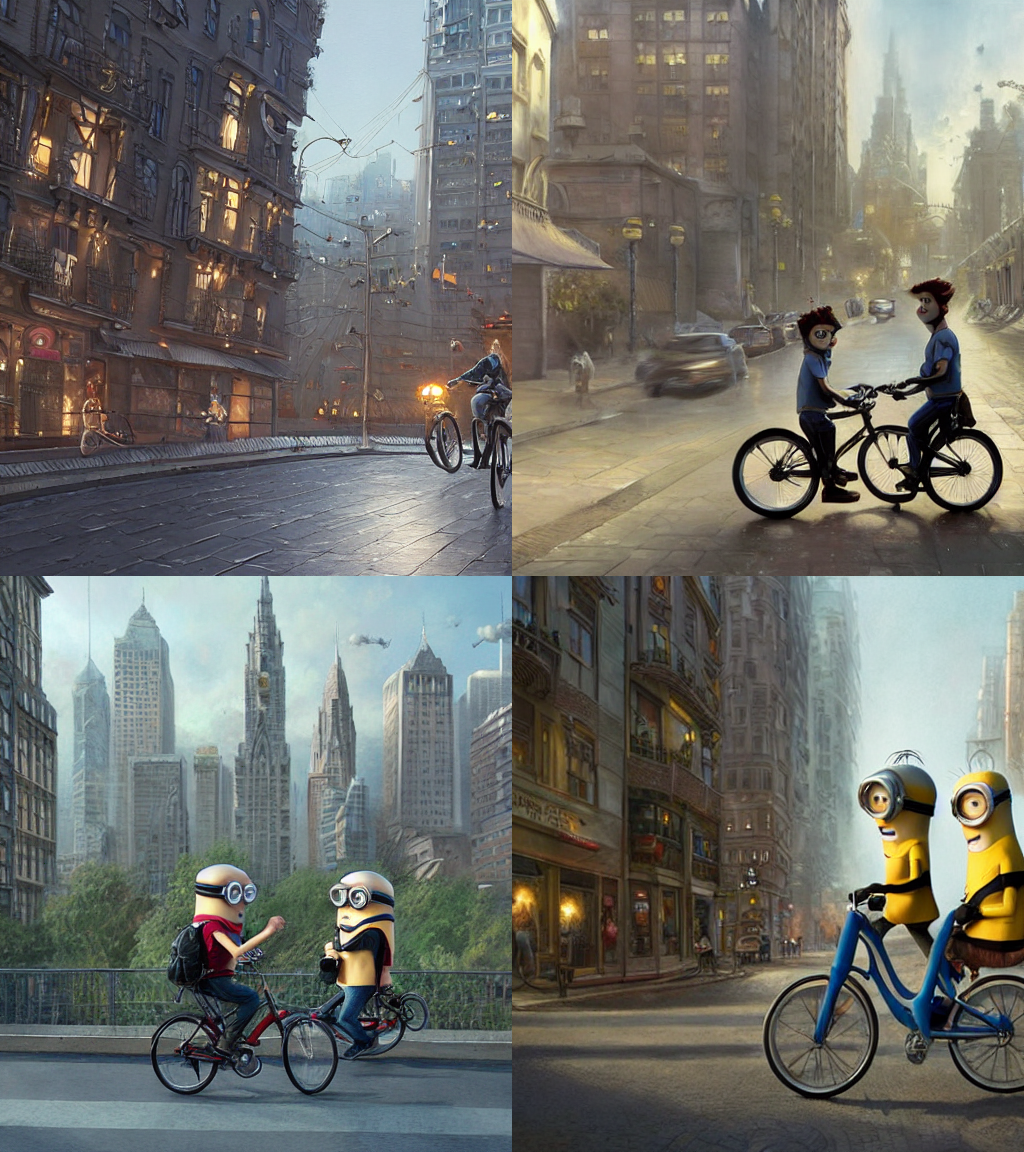

In [7]:
#@title ### 2c. Stable Diffusion txt2img
prompt = "Two minions riding a bicycle in the city, with the Guru, tone mapped, shiny, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by terry moore and greg rutkowski" #@param {type:"string"}

#@markdown Height of the Image:
H = 576 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Width of the Image:
W = 512 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Number of images to generate:
n = 4 #@param {type:"integer"}

#@markdown Seed:
seed = 3 #@param {type:"integer"}

#@markdown Steps to generate the image(lower number->faster but crappier image):
steps = 50 #@param {type:"slider", min:1, max:150, step:1}

#@markdown How strong your text prompt should influence the image(default 7.5)
guidance_scale = 7.5 #@param {type:"slider", min:6, max:15, step:0.1}

#@markdown ### Display Settings
show_grid = True #@param {type:"boolean"}
#@markdown If you have `show_grid` enabled, make sure `n = rows*columns`
#@markdown , Ignore if you have `show_grid` disabled.

prompt = [prompt] * n
generator = torch.Generator("cuda").manual_seed(seed)
with torch.autocast("cuda"):
    images = pipe_txt2image(prompt, num_inference_steps=steps, height=H, width=W, guidance_scale=guidance_scale)["images"]
    print("length of images = ", len(images))
    del generator

if show_grid:
    rows = 2 #@param {type:"integer"}
    columns = 2 #@param {type:"integer"}

    grid = image_grid(images, rows=rows, cols=columns)
    display(grid)

## ICE 1

Play around with the image data set above and:

a) Test the image generation for a really small steps vs large steps - What difference do you notice?
b) Test the image generation with a high guidance scale vs a low guidane scale - What do you notice?

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

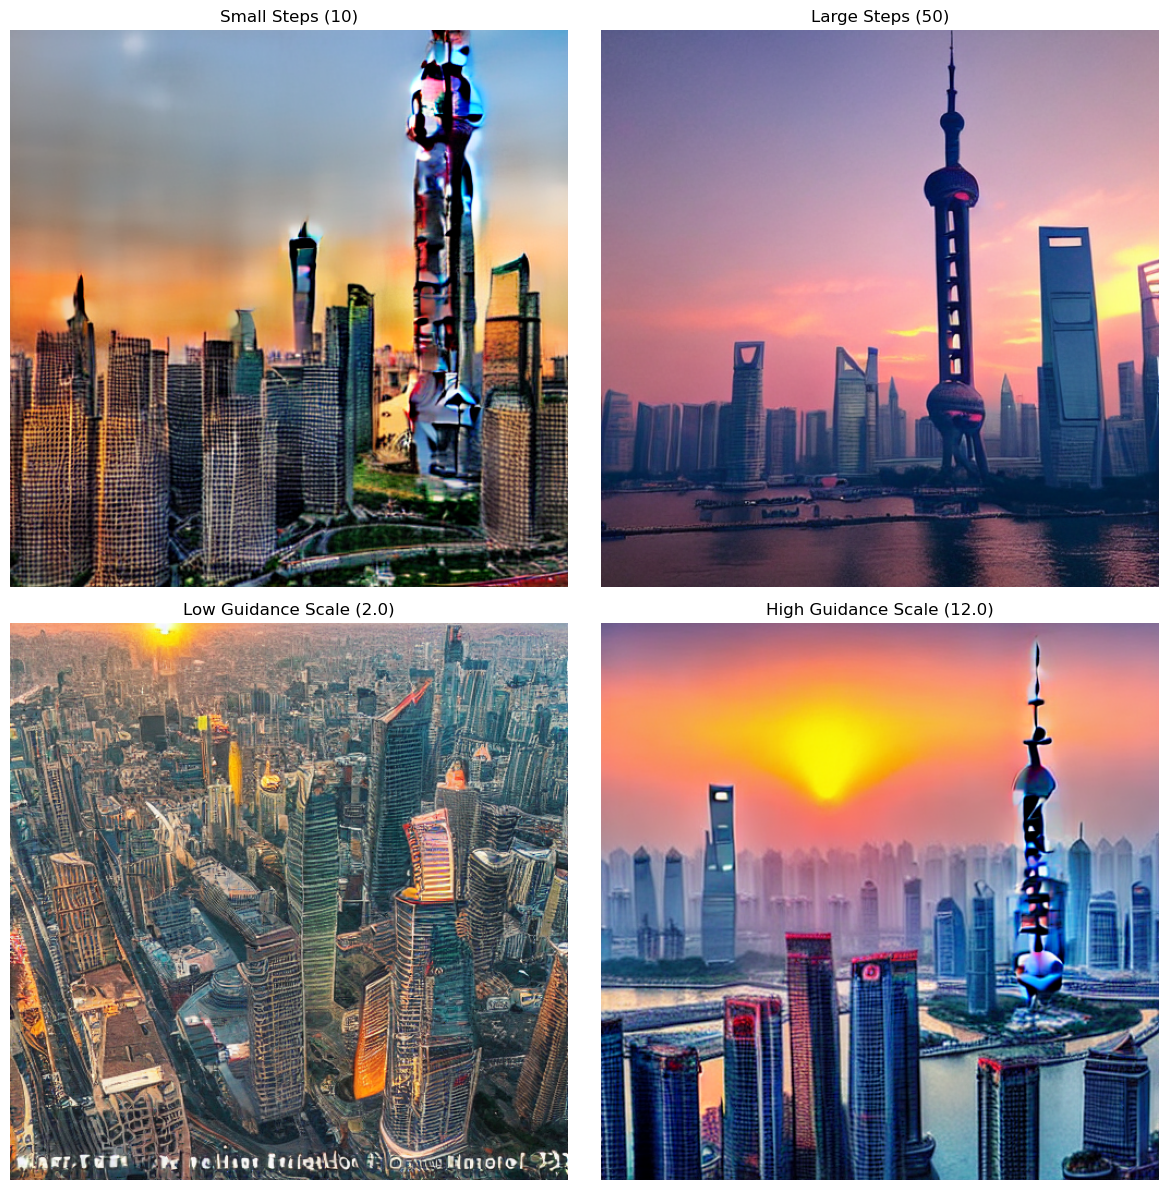

Generated images successfully!


In [8]:

## YOUR CODE HERE
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

prompt = "A beautiful sunset over the Shanghai skyline with the Oriental Pearl Tower"

small_steps = 10
large_steps = 50
low_guidance = 2.0
high_guidance = 12.0

# Generate images with different parameters
image_small_steps = pipe(prompt, num_inference_steps=small_steps, guidance_scale=7.5).images[0]
image_large_steps = pipe(prompt, num_inference_steps=large_steps, guidance_scale=7.5).images[0]

image_low_guidance = pipe(prompt, num_inference_steps=30, guidance_scale=low_guidance).images[0]
image_high_guidance = pipe(prompt, num_inference_steps=30, guidance_scale=high_guidance).images[0]


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image_small_steps)
axes[0, 0].set_title(f"Small Steps ({small_steps})")

axes[0, 1].imshow(image_large_steps)
axes[0, 1].set_title(f"Large Steps ({large_steps})")

axes[1, 0].imshow(image_low_guidance)
axes[1, 0].set_title(f"Low Guidance Scale ({low_guidance})")

axes[1, 1].imshow(image_high_guidance)
axes[1, 1].set_title(f"High Guidance Scale ({high_guidance})")

for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

image_small_steps.save("./small_steps.jpg")
image_large_steps.save("./large_steps.jpg")
image_low_guidance.save("./low_guidance.jpg")
image_high_guidance.save("./high_guidance.jpg")

print("Generated images successfully!")


### a) Small Steps vs Large Steps

**Small Steps (10):**
- Less detail with visible artifacts
- Distorted Oriental Pearl Tower with color inconsistencies
- Blurry building edges with deformations
- Overall "draft-like" appearance

**Large Steps (50):**
- Clearer and more coherent image
- More accurate tower structure
- Sharper building outlines with better details
- More natural sky and water transitions
- Overall more realistic and complete image

**Conclusion:** Increasing inference steps significantly improves image quality and detail. Small steps generate faster but with lower quality, while large steps require more computational resources but produce more refined, stable results.

### b) Low vs High Guidance Scale

**Low Guidance Scale (2.0):**
- More creative and free-form image
- Complex and diverse cityscape
- Richer color variations
- Weaker adherence to the prompt
- More natural but potentially less accurate building arrangement

**High Guidance Scale (12.0):**
- Stronger adherence to the prompt description
- More prominent and centered Oriental Pearl Tower
- Stronger color contrast with dramatic sunset effects
- More idealized building arrangement
- More stylized and simplified overall image

**Conclusion:** Guidance scale controls the model's "fidelity" to the prompt. Low guidance allows more creative freedom but may deviate from the prompt, while high guidance forces stricter prompt adherence but may produce overly rigid or exaggerated images. A medium guidance scale (7-8) typically achieves a good balance between creativity and prompt adherence for most applications.


## ICE 2

Imagine now that you want to use the starter image as a background and generate an image corrposnding to each caption with the background as a starter iamge.

For example: For the 4th image above - Generate minions with the background of the ocean and mountains.

How would your use of Stability APIs change? What would be a creative prompt that can get the job done here?

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

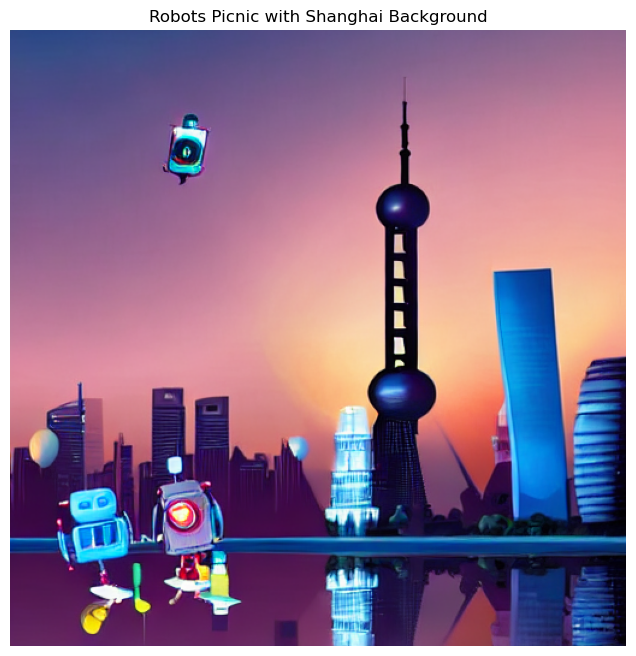

In [9]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
import PIL
import requests
import matplotlib.pyplot as plt
import os

# Check for CUDA availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the image-to-image pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained('runwayml/stable-diffusion-v1-5').to(device)

# Use one of the images generated in ICE1 as the starter image
starter_image_path = './large_steps.jpg' 
starter_image = PIL.Image.open(starter_image_path).convert('RGB').resize((512, 512))

# Creative prompt that adds new elements to the existing background
# This follows the example of "Generate minions with the background of the ocean and mountains"
prompt = 'A group of cute cartoon robots having a picnic in front of the Shanghai skyline. The robots have colorful metallic bodies, expressive digital eyes, and are enjoying mooncakes and tea. The Oriental Pearl Tower is visible in the background, with the sunset creating a beautiful orange glow behind the city.'

# Generation parameters
strength = 0.8  # Controls how much to transform the image (higher = more change)
guidance_scale = 7.5  # Controls how closely the image follows the prompt

# Generate the image
image = pipe(
    prompt=prompt,
    image=starter_image,
    strength=strength,
    guidance_scale=guidance_scale
).images[0]

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Robots Picnic with Shanghai Background')
plt.show()

# Save the generated image
output_dir = './ICE2'
os.makedirs(output_dir, exist_ok=True)
image.save(f'{output_dir}/robots_shanghai_picnic.png')


## API Usage Changes

When comparing my approach in ICE 2 to ICE 1, I made several important changes:

1. I switched from `StableDiffusionPipeline` to `StableDiffusionImg2ImgPipeline` since I needed to start with an existing image rather than generating one from scratch.

2. I added two critical parameters:
   - The `image` parameter to provide my starter image from ICE 1
   - A `strength` value of 0.8 to control how much of the original image to preserve

3. I carefully crafted my prompt to describe new elements (cartoon robots having a picnic) while referencing existing elements in the background (Shanghai skyline, Oriental Pearl Tower).

## Results and Observations

Looking at my generated image, I can see that:
- The robots were successfully added to the foreground
- The Shanghai skyline remains recognizable in the background
- The sunset colors from the original image were maintained
- The overall composition creates a cohesive scene

I found that the strength parameter was particularly important. At 0.8, it allowed enough change to add the robots while preserving the background. If I were to experiment further, I might try different strength values to see how they affect the balance between new and existing elements.

This exercise helped me understand how image-to-image diffusion can be used to build upon existing images rather than creating entirely new ones, which could be useful for many creative applications.
